## EDA mobile-price

### EDA para analizar si hay alguna relación entre las características de un teléfono móvil (por ejemplo: RAM, memoria interna, etc...) y su precio de venta.

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [131]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.io as pio
from plotly.offline import iplot , plot 
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [2]:
df = pd.read_csv('../dataset/train.csv')

### Lectura de los Datos

Significado de las columnas

- **battery_power** Energía total que una batería puede almacenar en un tiempo medido en (mAh)

- **blue** Tiene bluetooth o no

- **clock_speed** Velocidad a la que el microprocesador ejecuta instrucciones

- **dual_sim** Tiene soporte dual sim o no

- **fc** cámara frontal (Megapíxeles)

- **four_g** Tiene 4G o no

- **int_memory** Memoria interna en (Gigabytes)

- **m_dep** Fondo del móvil en (Cm)

- **mobile_wt** Peso del teléfono móvil

- **pc** cámara principal (megapíxeles)

- **px_height** Altura de resolución de píxeles

- **px_width** Ancho de resolución de píxeles

- **ram** Memoria de acceso aleatorio en (Megabytes)

- **sc_h** Alto pantalla del móvil en (Cm)

- **sc_w** Ancho de pantalla del móvil en (Cm)

- **talk_time** Tiempo más largo que durará una sola carga de batería cuando estás hablando constantemente por teléfono

- **three_g** Tiene 3G o no

- **touch_screen** Tiene pantalla táctil o no

- **wifi** Tiene wifi o no

- **n_cores** Número de núcleos del procesador

- **price_range** Variable objetivo con valor de:

     0: (bajo costo), 1: (costo medio), 2: (costo alto) y 3: (costo muy alto)

Primer vistazo a los datos que hay en el dataset.

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 2000
Number of Columns : 21


In [5]:
df.columns.tolist()

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

Creo un historigrama con todas las columnas del dataset, para ver la distribución de las columnas.

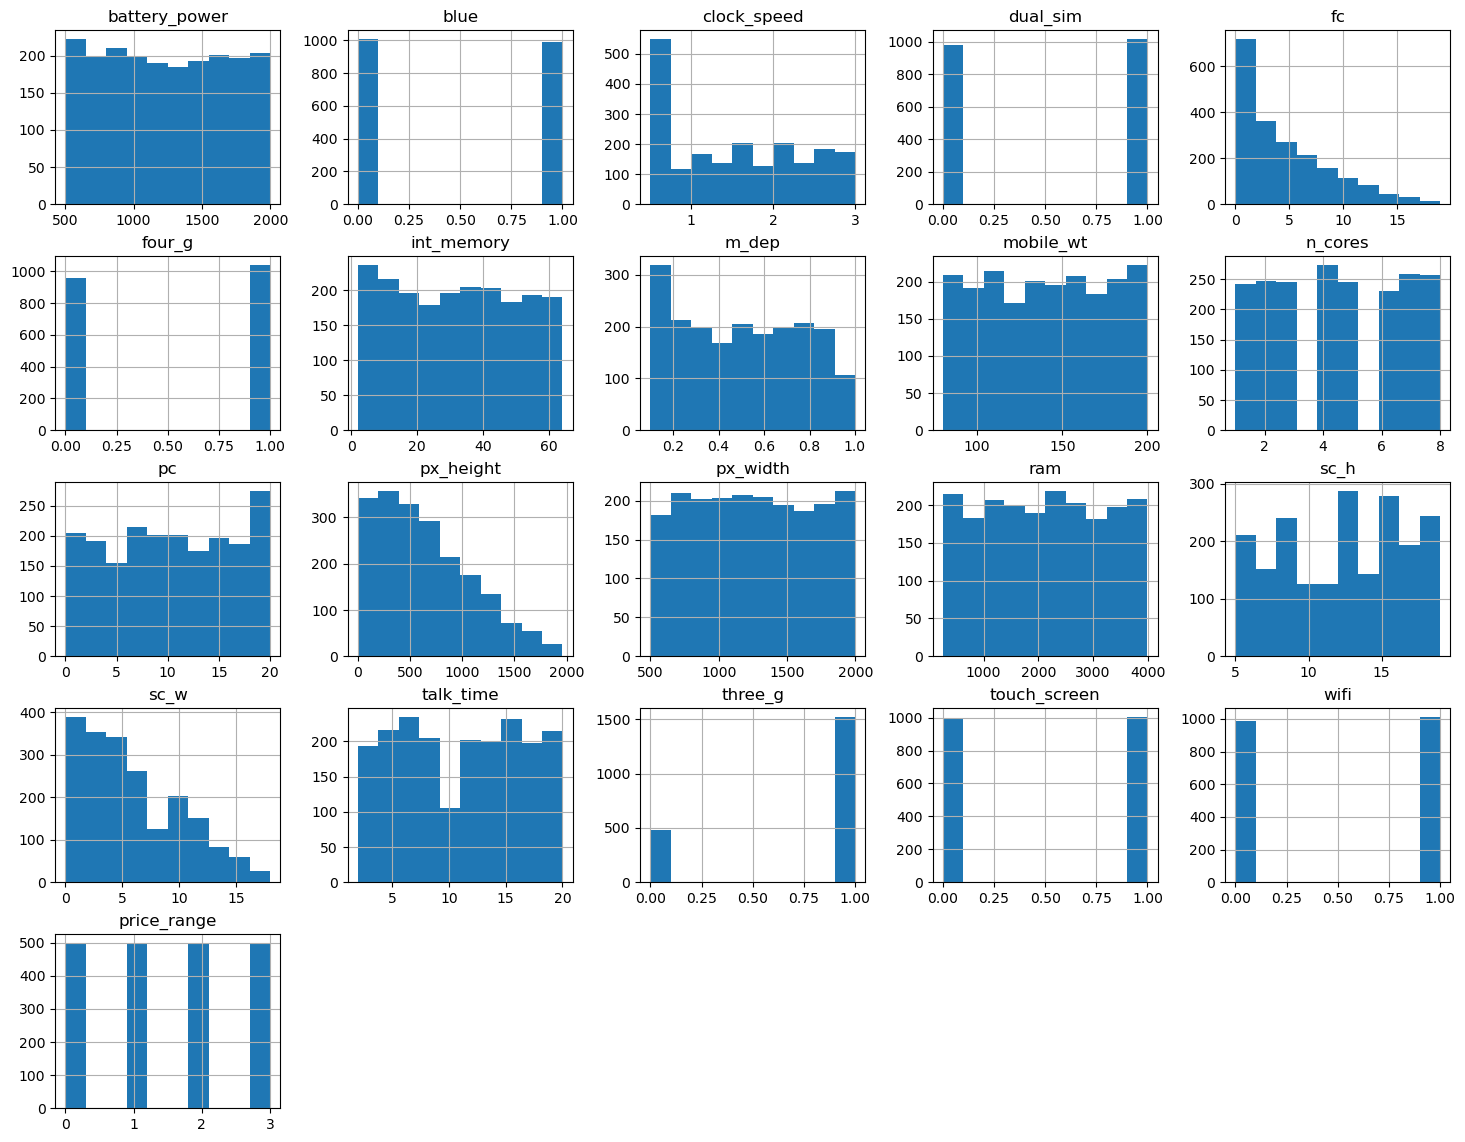

In [6]:
df.hist(figsize=(18, 14))
plt.show()

### Descripción de los datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Consulto el número de valores diferentes en cada columna.

In [8]:
df.nunique(axis=0)

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

Analisis estadístico

In [9]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


El dataset tiene 2000 filas y 21 columnas.

Hay 21 variables, 20 variables independientes y 1 variable dependiente: price_range.

No falta ningún valor en el conjunto de datos.

clock_speed y m_dep son de tipo float64, y el resto de tipo int64.

**Hay 7 variables categóricas ordinales**: 

    price_range 
    
    blue 
    
    dual_sim 
    
    four_g 
    
    three_g 
    
    touch_screen 
    
    wifi

**Hay 14 variables numéricas**: 

    battery_power 
    
    clock_speed 
    
    fc 
    
    int_memory 
    
    m_dep 
    
    mobile_wt 
    
    pc 
    
    px_height
    
    px_width
    
    ram
    
    talk_time
    
    sc_h 
    
    sc_w
    
    n_cores 

#### Hago una copia de los datos que guardo en 'movil', para trabajar con estos y conservar los originales.

In [10]:
movil = df.copy(deep=True)

### Limpieza de los datos

Compruebo si tiene valores null

In [11]:
movil.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
movil.isnull().sum().sum()

0

    - No tiene valores null

Compruebo si tiene valores duplicados

In [13]:
movil.duplicated().any()

False

    - No tiene valores duplicados

<Axes: >

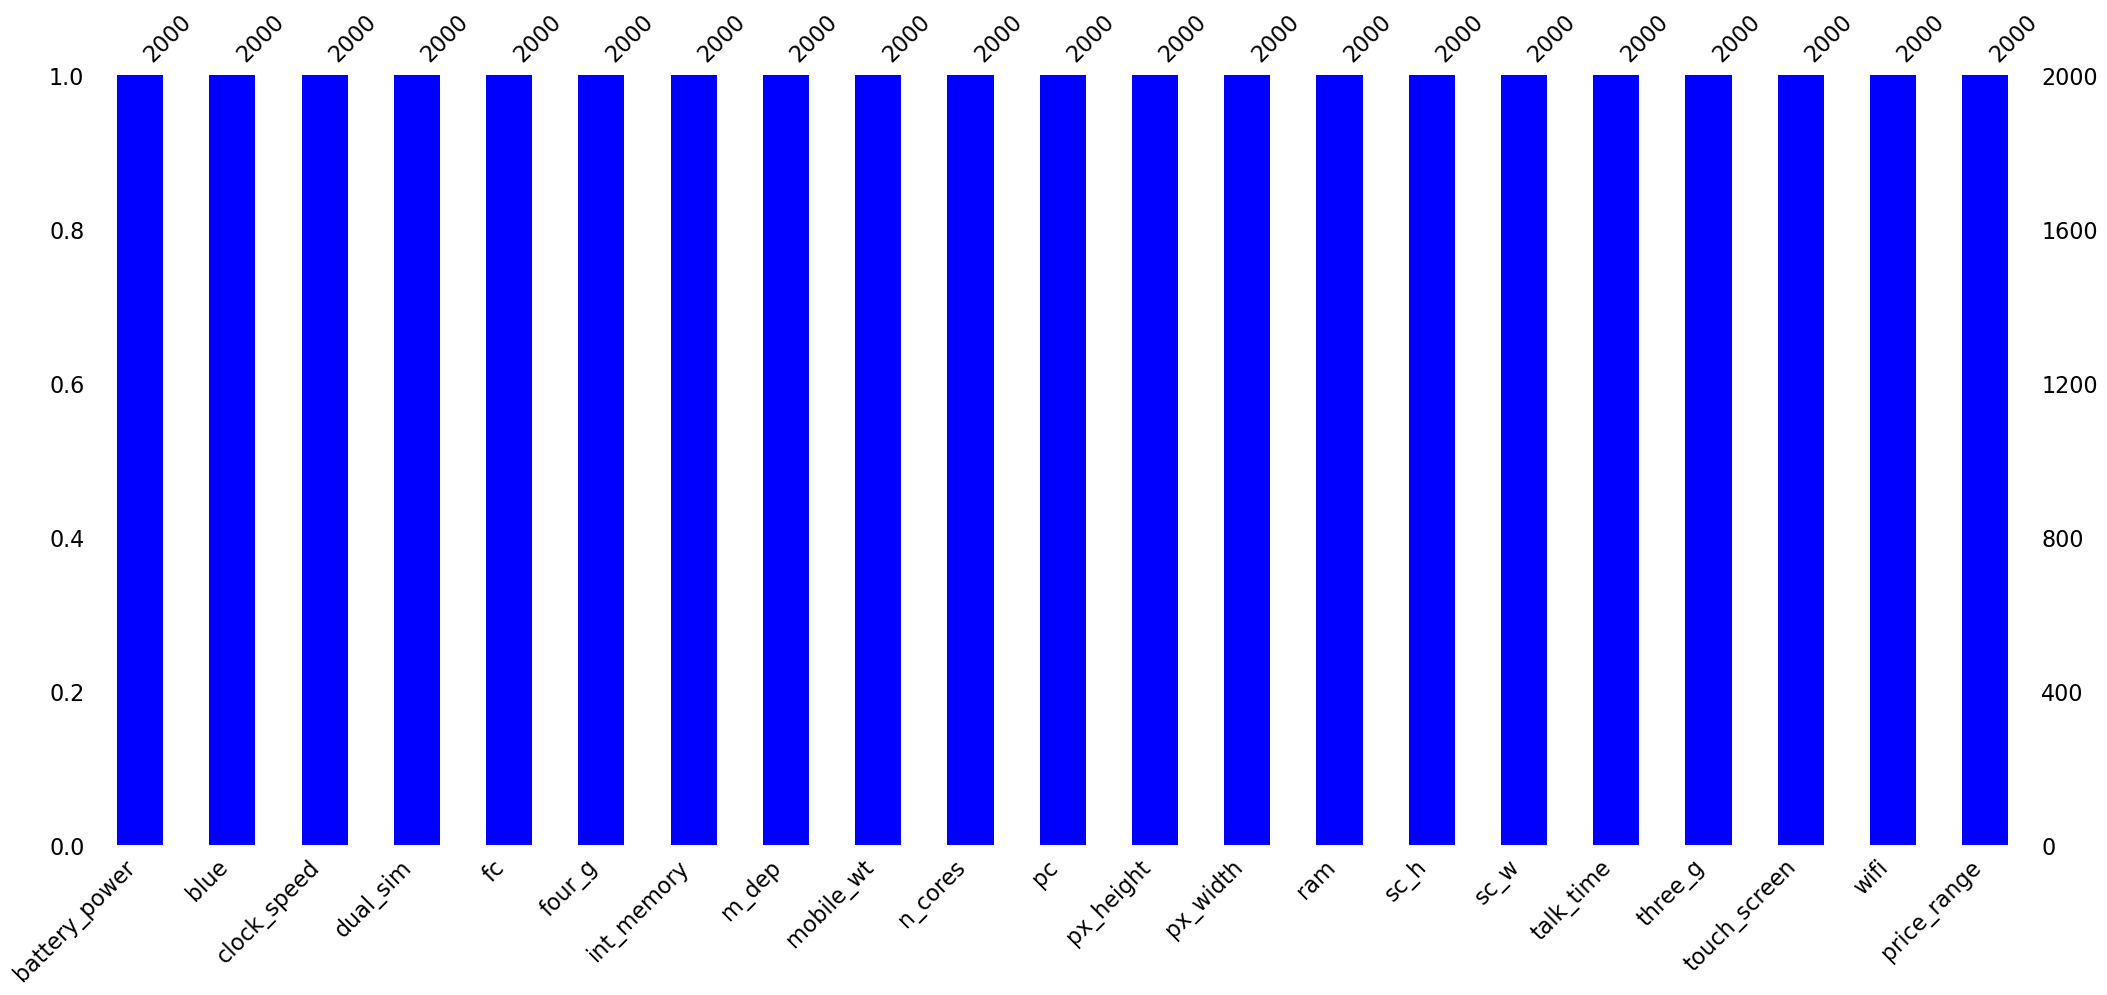

In [14]:
msno.bar(movil, color = "blue")

**No faltan datos en el dataset**

In [15]:
movil.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [16]:
movil['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

Hay 500 teléfonos móviles en cada una de las siguientes categorías: bajo costo, mediano costo, alto costo y muy alto costo, está nivelado.

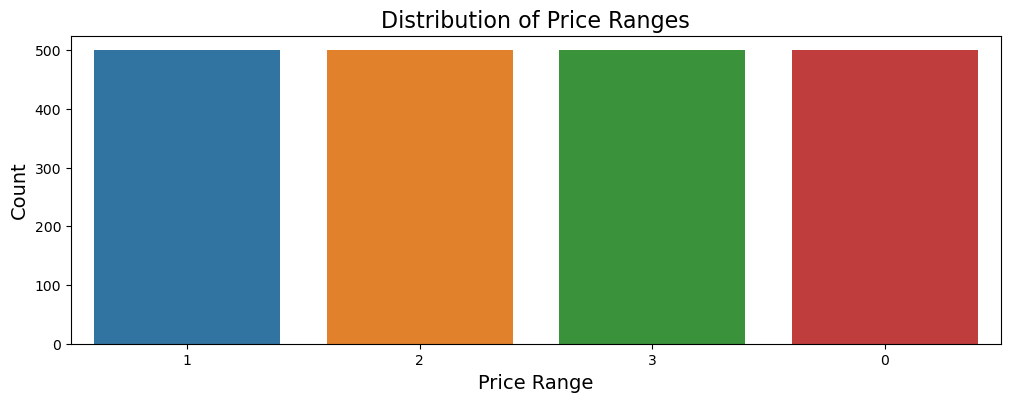

In [145]:
plt.figure(figsize=(12, 4))
sns.countplot(data=movil, x='price_range', order=movil['price_range'].value_counts().index)

plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Price Ranges', fontsize=16)

plt.show()

### 

### Analizar las variables numéricas y categóricas

#### Variables numéricas

In [31]:
nums = list(movil.select_dtypes(exclude=['object']).columns)
nums = list(movil[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'talk_time', 'sc_h', 'sc_w', 'n_cores' ]])
print(f'Variables numéricas: {nums}')

Variables numéricas: ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'talk_time', 'sc_h', 'sc_w', 'n_cores']


Hago un nuevo dataframe solo con las variables numéricas

In [32]:
df_nums= movil[nums]
df_nums.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,talk_time,sc_h,sc_w,n_cores
0,842,2.2,1,7,0.6,188,2,20,756,2549,19,9,7,2
1,1021,0.5,0,53,0.7,136,6,905,1988,2631,7,17,3,3
2,563,0.5,2,41,0.9,145,6,1263,1716,2603,9,11,2,5
3,615,2.5,0,10,0.8,131,9,1216,1786,2769,11,16,8,6
4,1821,1.2,13,44,0.6,141,14,1208,1212,1411,15,8,2,2


Análisis estadístico solo de las variables númericas

In [33]:
df_nums.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,talk_time,sc_h,sc_w,n_cores
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,9.916500,645.108000,1251.515500,2124.213000,11.011000,12.306500,5.767000,4.520500
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,6.064315,443.780811,432.199447,1084.732044,5.463955,4.213245,4.356398,2.287837
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,2.000000,5.000000,0.000000,1.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,5.000000,282.750000,874.750000,1207.500000,6.000000,9.000000,2.000000,3.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,10.000000,564.000000,1247.000000,2146.500000,11.000000,12.000000,5.000000,4.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,16.000000,9.000000,7.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,20.000000,19.000000,18.000000,8.000000


Gráficas interactivas para ver la relación de las variables numéricas con la variable 'price_range' rango de precios

In [43]:
# Combino las variables numéricas con la variable dependiente 'price_range'
df_combined = pd.concat([df_nums, df['price_range']], axis=1)

for col in df_nums.columns:
    fig = go.Figure()
    for val in df_combined['price_range'].unique():
        df_filtered = df_combined[df_combined['price_range'] == val]
        fig.add_trace(go.Box(y=df_filtered[col], name=f'Price Range: {val}'))

    fig.update_layout(title=f"Efecto de {col} en el Precio",
                      xaxis_title='Price Range',
                      yaxis_title=col,
                      template='ggplot2')
    fig.show()

A medida que aumenta la potencia de la batería aumenta el precio.

Mas memoria interna sube ligeramente el precio.

Cuanto mayor es la capacidad de la RAM, mucho mayor es el precio.

Cuando aumenta el ancho de resolución de píxeles, y la altura de la pantalla se incrementa el precio.

El número de núcleos del procesador, no hace variar mucho el precio para moviles de gama media, alta, y muy alta, pero en los moviles de gama baja el precio es claramente más bajo.

#### Analizamos las columnas en busca de **Outliers**

In [45]:
# Utilizando a formula de tukey

def tukey_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers

for col in nums:
    outliers = tukey_outliers(df_nums[col])
    if len(outliers):
        print(f"* {col} tiene estos valores atípicos,\n{outliers}\n")
    else:
        print(f"* {col} no tiene valores atípicos.\n")

* battery_power no tiene valores atípicos.

* clock_speed no tiene valores atípicos.

* fc tiene estos valores atípicos,
95      18
169     17
226     18
229     17
300     17
305     18
372     17
584     17
1387    18
1406    18
1416    18
1549    17
1554    18
1693    18
1705    19
1880    18
1882    18
1888    18
Name: fc, dtype: int64

* int_memory no tiene valores atípicos.

* m_dep no tiene valores atípicos.

* mobile_wt no tiene valores atípicos.

* pc no tiene valores atípicos.

* px_height tiene estos valores atípicos,
988     1949
1771    1960
Name: px_height, dtype: int64

* px_width no tiene valores atípicos.

* ram no tiene valores atípicos.

* talk_time no tiene valores atípicos.

* sc_h no tiene valores atípicos.

* sc_w no tiene valores atípicos.

* n_cores no tiene valores atípicos.



La columna '**fc**' cámara frontal tiene valores atípicos.

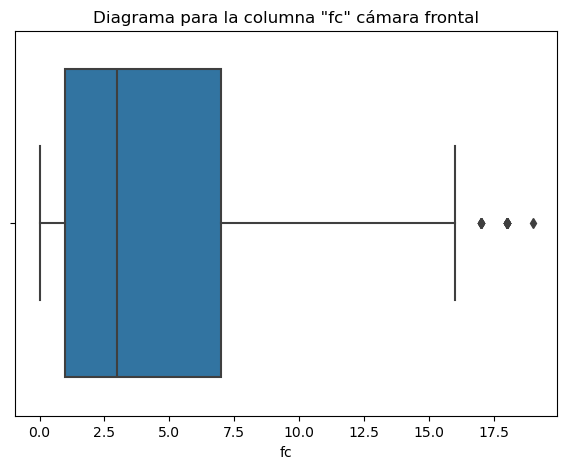

In [77]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df_nums['fc'])
plt.title('Diagrama para la columna "fc" cámara frontal')

plt.show()

Estos valores atípicos, podrían deberse a resoluciones especialmente altas en la cámara frontal de los moviles, cuando son de gamas muy altas.

### Correlaciones para las variables numéricas

Visualizamos una matriz de correlación entre las diferentes variables numéricas, lo que nos da una impresión rápida de las correlaciones más fuertes (colores más cercanos a un amarillo brillante).

In [80]:
correlation_matrix = df_combined.corr()

fig = ff.create_annotated_heatmap(z=correlation_matrix.values,
                                  x=correlation_matrix.columns.tolist(),
                                  y=correlation_matrix.columns.tolist(),
                                  colorscale='Viridis',
                                  annotation_text=correlation_matrix.values.round(2))

fig.update_layout(width=800, height=600)

fig.update_layout(title_text='Matriz de Correlaciones',
                  xaxis=dict(title='Variables'),
                  yaxis=dict(title='Variables'))


fig.show()


In [81]:
df_combined.corr()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,talk_time,sc_h,sc_w,n_cores,price_range
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,0.031441,0.014901,-0.008402,-0.000653,0.052510,-0.029959,-0.021421,-0.029727,0.200723
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005245,-0.014523,-0.009476,0.003443,-0.011432,-0.029078,-0.007378,-0.005724,-0.006606
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,0.644595,-0.009990,-0.005176,0.015099,-0.006829,-0.011014,-0.012373,-0.013356,0.021998
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.033273,0.010441,-0.008335,0.032813,-0.002790,0.037771,0.011731,-0.028310,0.044435
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,0.026282,0.025263,0.023566,-0.009434,0.017003,-0.025348,-0.018388,-0.003504,0.000853
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,0.018844,0.000939,0.000090,-0.002581,0.006209,-0.033855,-0.020761,-0.018989,-0.030302
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,1.000000,-0.018465,0.004196,0.028984,0.014657,0.004938,-0.023819,-0.001193,0.033599
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.018465,1.000000,0.510664,-0.020352,-0.010645,0.059615,0.043038,-0.006872,0.148858
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.004196,0.510664,1.000000,0.004105,0.006720,0.021599,0.034699,0.024480,0.165818
ram,-0.000653,0.003443,0.015099,0.032813,-0.009434,-0.002581,0.028984,-0.020352,0.004105,1.000000,0.010820,0.015996,0.035576,0.004868,0.917046


In [82]:
corr_matrix = df_combined.corr()
corr_matrix["price_range"].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
sc_h             0.022986
fc               0.021998
talk_time        0.021859
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
Name: price_range, dtype: float64

Hay una clara correlación especialmente de la variable 'ram' y también de 'battery_power' con la variable 'price_range', cuanto mayor capacidad de batería y mayor RAM más elevado es el precio.

#### Variables categóricas

In [138]:
cats = list(movil.select_dtypes(include=['object']).columns)
cats = list(movil[['price_range', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']])
print(f'Variables categóricas: {cats}')

Variables categóricas: ['price_range', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']


Hago un nuevo dataframe solo con las variables categóricas

In [139]:
df_cat= movil[cats]
df_cat.head()

,price_range,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,1,0,0,0,0,0,1
1,2,1,1,1,1,1,0
2,2,1,1,1,1,1,0
3,2,1,0,0,1,0,0
4,1,1,0,1,1,1,0


Todas las variables categóricas menos 'price_range' son variables categóricas con características binarias (presente/ausente).

Análisis estadístico solo de las variables categóricas

In [140]:
df_cat.describe()

,price_range,blue,dual_sim,four_g,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.500000,0.4950,0.509500,0.521500,0.761500,0.503000,0.507000
std,1.118314,0.5001,0.500035,0.499662,0.426273,0.500116,0.500076
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.500000,0.0000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.250000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000


Gráficas para ver la relación de las variables categóricas con la variable 'price_range' rango de precios

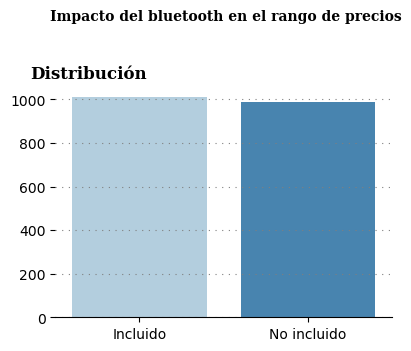

In [175]:
fig = plt.figure(figsize=(10,3))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120, 1.1, 'Impacto del bluetooth en el rango de precios', fontfamily='serif', fontsize=10, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])

sns.countplot(x='blue', data=df_cat, palette='Blues', ax=ax0)

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax0.set_title('Distribución', fontsize=12, fontfamily='serif', fontweight='bold', x=0.1, y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Incluido","No incluido"])
ax0.set_xlabel("")
ax0.set_ylabel("")

plt.show()

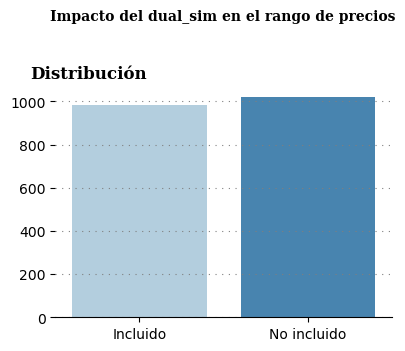

In [174]:
fig = plt.figure(figsize=(10,3))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120, 1.1, 'Impacto del dual_sim en el rango de precios', fontfamily='serif', fontsize=10, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])

sns.countplot(x='dual_sim', data=df_cat, palette='Blues', ax=ax0)

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax0.set_title('Distribución', fontsize=12, fontfamily='serif', fontweight='bold', x=0.1, y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Incluido","No incluido"])
ax0.set_xlabel("")
ax0.set_ylabel("")

plt.show()

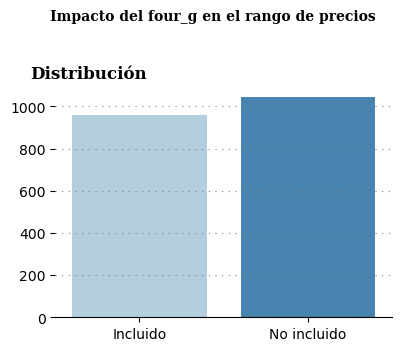

In [176]:
fig = plt.figure(figsize=(10,3))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120, 1.1, 'Impacto del four_g en el rango de precios', fontfamily='serif', fontsize=10, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])

sns.countplot(x='four_g', data=df_cat, palette='Blues', ax=ax0)

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax0.set_title('Distribución', fontsize=12, fontfamily='serif', fontweight='bold', x=0.1, y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Incluido","No incluido"])
ax0.set_xlabel("")
ax0.set_ylabel("")

plt.show()

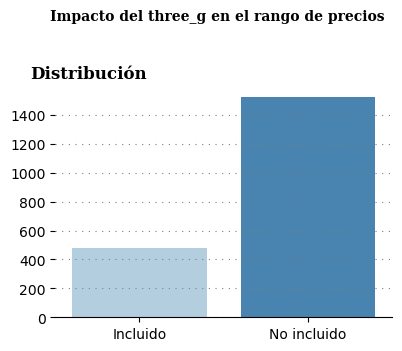

In [177]:
fig = plt.figure(figsize=(10,3))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120, 1.1, 'Impacto del three_g en el rango de precios', fontfamily='serif', fontsize=10, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])

sns.countplot(x='three_g', data=df_cat, palette='Blues', ax=ax0)

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax0.set_title('Distribución', fontsize=12, fontfamily='serif', fontweight='bold', x=0.1, y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Incluido","No incluido"])
ax0.set_xlabel("")
ax0.set_ylabel("")

plt.show()

Text(0, 0.5, '')

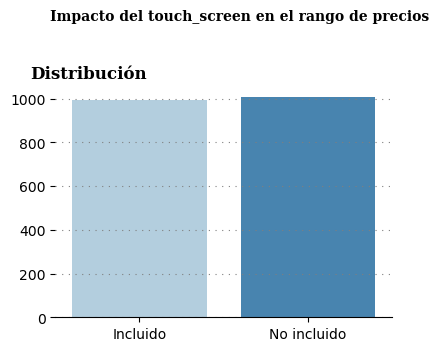

In [179]:
fig = plt.figure(figsize=(10,3))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120, 1.1, 'Impacto del touch_screen en el rango de precios', fontfamily='serif', fontsize=10, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])

sns.countplot(x='touch_screen', data=df_cat, palette='Blues', ax=ax0)

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax0.set_title('Distribución', fontsize=12, fontfamily='serif', fontweight='bold', x=0.1, y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Incluido","No incluido"])
ax0.set_xlabel("")
ax0.set_ylabel("")

Text(0, 0.5, '')

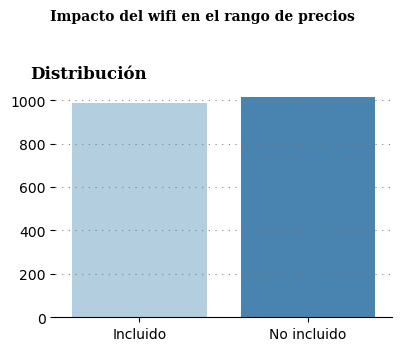

In [180]:
fig = plt.figure(figsize=(10,3))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120, 1.1, 'Impacto del wifi en el rango de precios', fontfamily='serif', fontsize=10, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])

sns.countplot(x='wifi', data=df_cat, palette='Blues', ax=ax0)

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax0.set_title('Distribución', fontsize=12, fontfamily='serif', fontweight='bold', x=0.1, y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Incluido","No incluido"])
ax0.set_xlabel("")
ax0.set_ylabel("")

### Correlaciones para las variables categóricas

In [152]:
df_cat.corr()

,price_range,blue,dual_sim,four_g,three_g,touch_screen,wifi
price_range,1.000000,0.020573,0.017444,0.014772,0.023611,-0.030411,0.018785
blue,0.020573,1.000000,0.035198,0.013443,-0.030236,0.010061,-0.021863
dual_sim,0.017444,0.035198,1.000000,0.003187,-0.014008,-0.017117,0.022740
four_g,0.014772,0.013443,0.003187,1.000000,0.584246,0.016758,-0.017620
three_g,0.023611,-0.030236,-0.014008,0.584246,1.000000,0.013917,0.004316
touch_screen,-0.030411,0.010061,-0.017117,0.016758,0.013917,1.000000,0.011917
wifi,0.018785,-0.021863,0.022740,-0.017620,0.004316,0.011917,1.000000


In [148]:
correlation_matrix = df_cat.corr()

fig = ff.create_annotated_heatmap(z=correlation_matrix.values,
                                  x=correlation_matrix.columns.tolist(),
                                  y=correlation_matrix.columns.tolist(),
                                  colorscale='Viridis',
                                  annotation_text=correlation_matrix.values.round(2))

fig.update_layout(width=800, height=600)

fig.update_layout(title_text='Matriz de Correlaciones',
                  xaxis=dict(title='Variables'),
                  yaxis=dict(title='Variables'))


fig.show()

In [150]:
corr_matrix = df_cat.corr()
corr_matrix["price_range"].sort_values(ascending=False)

price_range     1.000000
three_g         0.023611
blue            0.020573
wifi            0.018785
dual_sim        0.017444
four_g          0.014772
touch_screen   -0.030411
Name: price_range, dtype: float64

#### Correlaciones entre las variables 

In [153]:
movil.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [158]:
correlation_matrix = movil.corr()

fig = ff.create_annotated_heatmap(z=correlation_matrix.values,
                                  x=correlation_matrix.columns.tolist(),
                                  y=correlation_matrix.columns.tolist(),
                                  colorscale='Viridis',
                                  annotation_text=correlation_matrix.values.round(2))

fig.update_layout(width=900, height=900)

fig.update_layout(title_text='Matriz de Correlaciones',
                  xaxis=dict(title='Variables'),
                  yaxis=dict(title='Variables'))


fig.show()

In [156]:
corr_matrix = movil.corr()
corr_matrix["price_range"].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

Las correlaciones más significativas se dan entre las variables numéricas y la variable 'price_range', son las que directamente afectan en el rango del precios de los móviles.